<a href="https://colab.research.google.com/github/LukmaanViscomi/AI-Deep-Learning/blob/main/resubmit_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Data Preprocessing
In this section, we load the dataset, handle missing data, encode categorical variables, and standardize numerical features. These steps ensure that the data is clean and ready for training the machine learning models.




In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/classification_data.csv')  # Update with your dataset path

# Handle missing data for numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])

# Encode categorical columns into numerical values
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Task 2: Hyperparameter Tuning with GridSearchCV
In this section, we use `GridSearchCV` to perform hyperparameter tuning for three models:
- Logistic Regression
- Decision Tree
- Multi-Layer Perceptron (MLP Classifier)

We tune each model using a grid of hyperparameters and collect the best parameters and cross-validation scores for each model.


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for the three models
param_grid_logreg = {'C': [0.1, 1.0, 10.0], 'solver': ['lbfgs', 'liblinear']}
param_grid_tree = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001]
}

# Logistic Regression tuning
grid_logreg = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_logreg, cv=3)
grid_logreg.fit(X_train, y_train)
logreg_results = pd.DataFrame(grid_logreg.cv_results_)

# Decision Tree tuning
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=3)
grid_tree.fit(X_train, y_train)
tree_results = pd.DataFrame(grid_tree.cv_results_)

# MLP Classifier tuning
grid_mlp = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid_mlp, cv=3)
grid_mlp.fit(X_train, y_train)
mlp_results = pd.DataFrame(grid_mlp.cv_results_)


# Task 3: Visualizing Hyperparameter Tuning Results
This section visualizes the results of hyperparameter tuning for each model. We plot how the cross-validation accuracy changes based on the hyperparameters for each model:
- Logistic Regression: C (inverse regularization strength)
- Decision Tree: max depth
- MLP Classifier: hidden layer sizes and activation functions


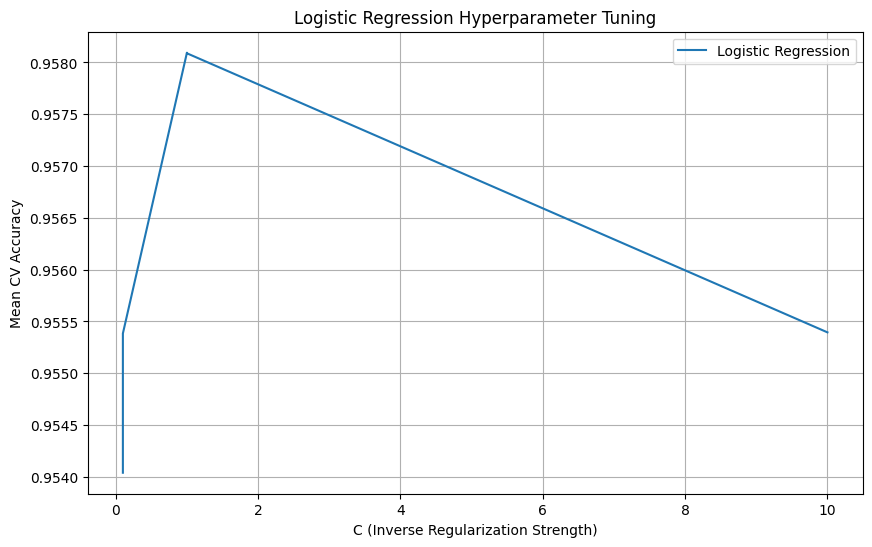

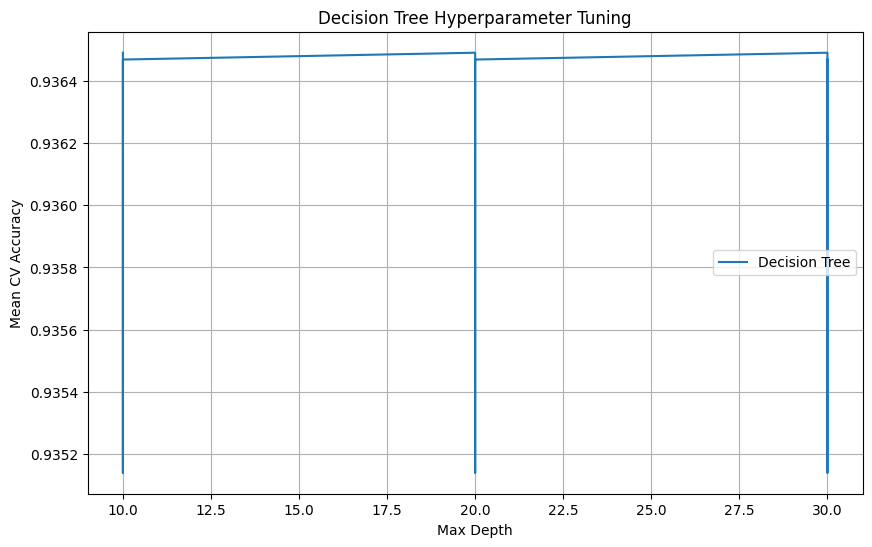

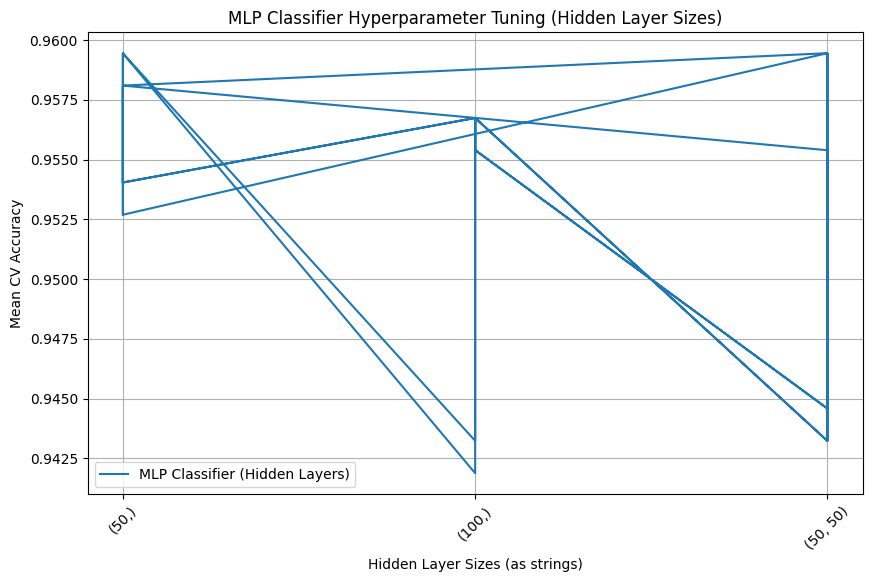

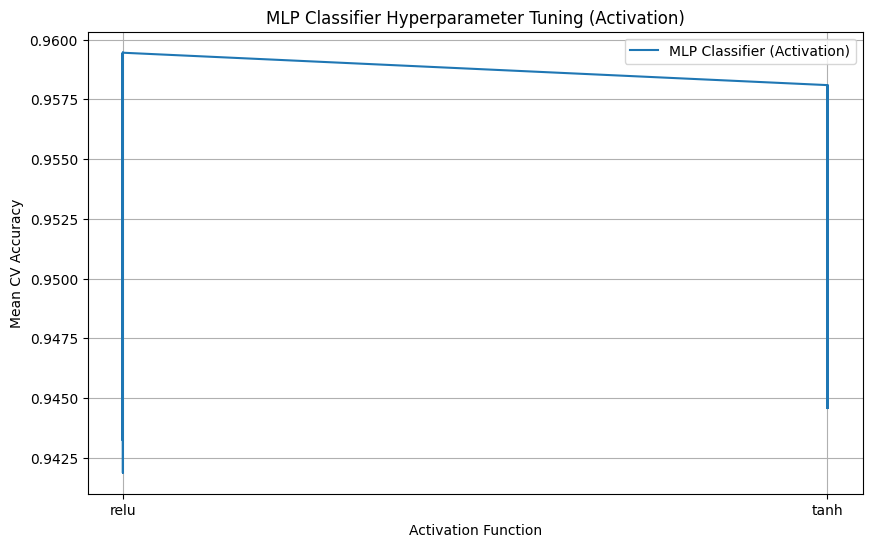

In [3]:
import matplotlib.pyplot as plt

# Convert 'param_hidden_layer_sizes' from tuples to strings for visualization
mlp_results['hidden_layer_sizes_str'] = mlp_results['param_hidden_layer_sizes'].apply(lambda x: str(x))

# Logistic Regression Hyperparameter Tuning
plt.figure(figsize=(10, 6))
plt.plot(logreg_results['param_C'], logreg_results['mean_test_score'], label='Logistic Regression')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Mean CV Accuracy')
plt.title('Logistic Regression Hyperparameter Tuning')
plt.legend()
plt.grid(True)
plt.show()

# Decision Tree Hyperparameter Tuning
plt.figure(figsize=(10, 6))
plt.plot(tree_results['param_max_depth'], tree_results['mean_test_score'], label='Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Mean CV Accuracy')
plt.title('Decision Tree Hyperparameter Tuning')
plt.legend()
plt.grid(True)
plt.show()

# MLP Classifier Hyperparameter Tuning (Hidden Layer Sizes)
plt.figure(figsize=(10, 6))
plt.plot(mlp_results['hidden_layer_sizes_str'], mlp_results['mean_test_score'], label='MLP Classifier (Hidden Layers)')
plt.xlabel('Hidden Layer Sizes (as strings)')
plt.ylabel('Mean CV Accuracy')
plt.title('MLP Classifier Hyperparameter Tuning (Hidden Layer Sizes)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# MLP Classifier Hyperparameter Tuning (Activation)
plt.figure(figsize=(10, 6))
plt.plot(mlp_results['param_activation'], mlp_results['mean_test_score'], label='MLP Classifier (Activation)')
plt.xlabel('Activation Function')
plt.ylabel('Mean CV Accuracy')
plt.title('MLP Classifier Hyperparameter Tuning (Activation)')
plt.legend()
plt.grid(True)
plt.show()


# Task 4: Displaying Best Parameters for Each Model
In this section, we display the best parameters and cross-validation scores for each model after tuning.


In [4]:
# Display best parameters for each model
best_params_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'MLP Classifier'],
    'Best Params': [grid_logreg.best_params_, grid_tree.best_params_, grid_mlp.best_params_],
    'Best Score (CV)': [grid_logreg.best_score_, grid_tree.best_score_, grid_mlp.best_score_]
})

print(best_params_df)



                 Model                                        Best Params  \
0  Logistic Regression                      {'C': 1.0, 'solver': 'lbfgs'}   
1        Decision Tree        {'max_depth': None, 'min_samples_split': 2}   
2       MLP Classifier  {'activation': 'relu', 'alpha': 0.0001, 'hidde...   

   Best Score (CV)  
0         0.958093  
1         0.936490  
2         0.959448  


# Task 5: Performance Comparison After Tuning
After finding the best hyperparameters, we re-train each model with these optimal parameters and compare their performance on the test set.


In [5]:
# Import accuracy_score to calculate test accuracy
from sklearn.metrics import accuracy_score

# Logistic Regression with best parameters
best_logreg = LogisticRegression(**grid_logreg.best_params_, max_iter=1000, random_state=42)
best_logreg.fit(X_train, y_train)
logreg_test_acc = accuracy_score(y_test, best_logreg.predict(X_test))

# Decision Tree with best parameters
best_tree = DecisionTreeClassifier(**grid_tree.best_params_, random_state=42)
best_tree.fit(X_train, y_train)
tree_test_acc = accuracy_score(y_test, best_tree.predict(X_test))

# MLP Classifier with best parameters
best_mlp = MLPClassifier(**grid_mlp.best_params_, max_iter=1000, random_state=42)
best_mlp.fit(X_train, y_train)
mlp_test_acc = accuracy_score(y_test, best_mlp.predict(X_test))

# Collect the test set performances
performance_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'MLP Classifier'],
    'Test Accuracy': [logreg_test_acc, tree_test_acc, mlp_test_acc]
})

print(performance_comparison)



                 Model  Test Accuracy
0  Logistic Regression       0.956757
1        Decision Tree       0.940541
2       MLP Classifier       0.962162


# Interim Conclusion
We have processed the dataset, tuned hyperparameters using GridSearchCV, and compared the performance of three models: Logistic Regression, Decision Tree, and MLP Classifier. We visualized the tuning results and re-trained the models using the best parameters to evaluate their performance on the test set.


# Task 6: Visualizing Predictions and Model Performance Metrics
This section visualizes the performance of the best-performing model (identified from the test accuracy comparison). We'll generate several key metrics and charts to analyze the model's performance:
- Confusion Matrix (Normalized)
- Classification Report
- Cumulative Gains Chart
- ROC Curve
- Precision-Recall Curve
- Learning Curves
- Feature Importances (if applicable)
- Partial Dependence Plot (for feature analysis)


Confusion Matrix (Normalized) and Classification Report

The best model is: MLP Classifier with Test Accuracy: 0.9621621621621622
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96        97
         1.0       0.97      0.95      0.96        88

    accuracy                           0.96       185
   macro avg       0.96      0.96      0.96       185
weighted avg       0.96      0.96      0.96       185



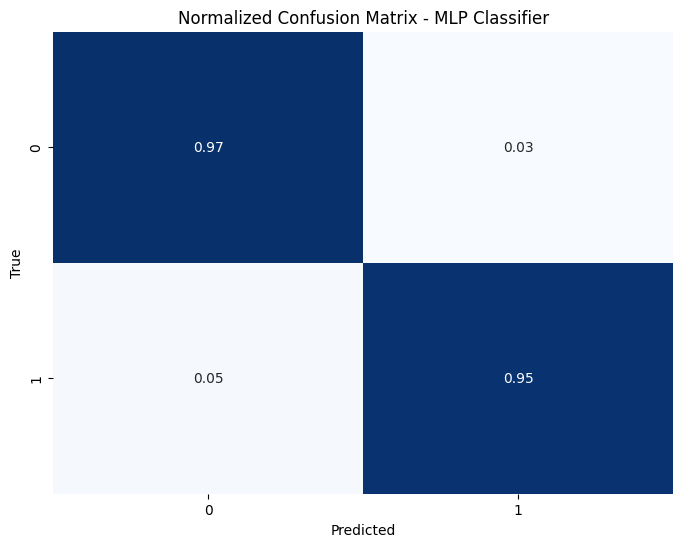

In [14]:
# Select the model with the highest test accuracy
best_model = None
best_model_name = ''
best_test_acc = max([logreg_test_acc, tree_test_acc, mlp_test_acc])

if best_test_acc == logreg_test_acc:
    best_model = best_logreg
    best_model_name = 'Logistic Regression'
elif best_test_acc == tree_test_acc:
    best_model = best_tree
    best_model_name = 'Decision Tree'
elif best_test_acc == mlp_test_acc:
    best_model = best_mlp
    best_model_name = 'MLP Classifier'

print(f"The best model is: {best_model_name} with Test Accuracy: {best_test_acc}")

# Generate predictions using the best model
y_pred_best = best_model.predict(X_test)

# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report:")
print(classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best, normalize='true')

# Plot Normalized Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title(f'Normalized Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Cumulative Gains Chart

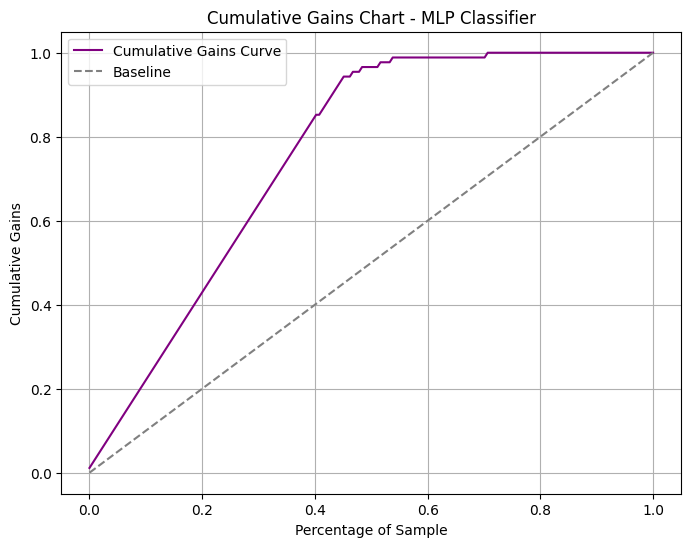

In [15]:
# Cumulative Gains Chart
import numpy as np

def cumulative_gain(y_true, y_prob):
    sorted_indices = np.argsort(y_prob)[::-1]
    sorted_true = np.array(y_true)[sorted_indices]
    cum_gain = np.cumsum(sorted_true) / np.sum(sorted_true)
    return cum_gain

if hasattr(best_model, "predict_proba"):  # Only create the chart if predict_proba is available
    y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability estimates

    cum_gain = cumulative_gain(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(np.linspace(0, 1, len(cum_gain)), cum_gain, label='Cumulative Gains Curve', color='purple')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Baseline')
    plt.xlabel('Percentage of Sample')
    plt.ylabel('Cumulative Gains')
    plt.title(f'Cumulative Gains Chart - {best_model_name}')
    plt.grid(True)
    plt.legend()
    plt.show()


ROC Curve

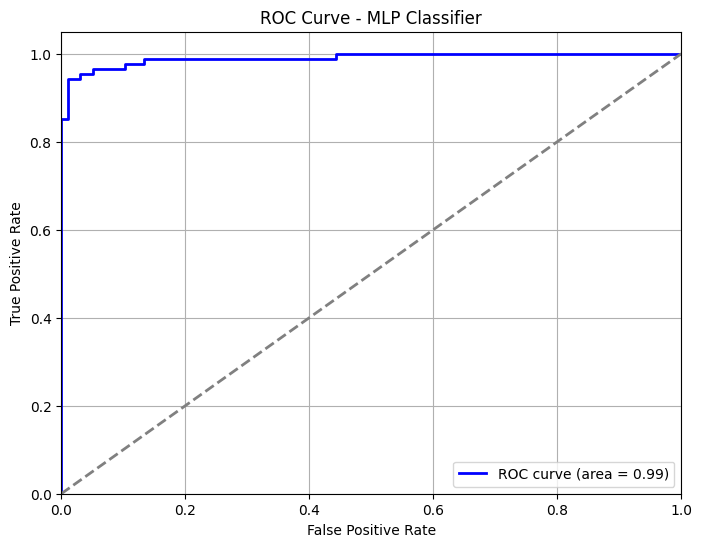

In [16]:
from sklearn.metrics import roc_curve, auc

if hasattr(best_model, "predict_proba"):  # Only create ROC curve if predict_proba is available
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {best_model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


Precision-Recall Curve

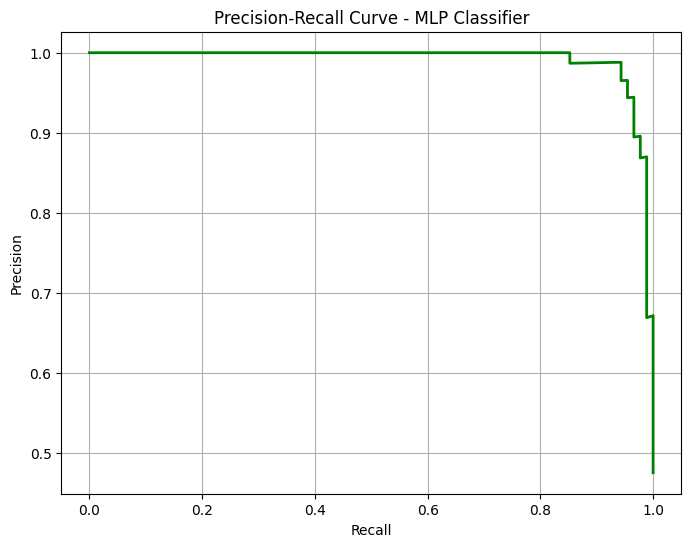

In [17]:
from sklearn.metrics import precision_recall_curve

if hasattr(best_model, "predict_proba"):  # Only create Precision-Recall curve if predict_proba is available
    precision, recall, _ = precision_recall_curve(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {best_model_name}')
    plt.grid(True)
    plt.show()


Learning Curves

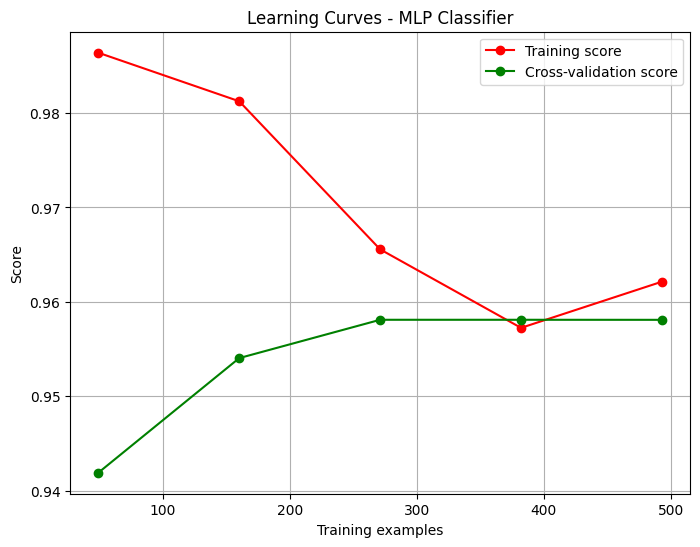

In [23]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Learning curve for the best model
plot_learning_curve(best_model, f'Learning Curves - {best_model_name}', X_train, y_train, cv=3)
plt.show()


Feature Importances

In [24]:
# Feature Importances (only for Decision Tree or similar models)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X.columns

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances, y=feature_names)
    plt.title(f'Feature Importances - {best_model_name}')
    plt.show()


Partial Dependence Plot (for feature analysis)

In [25]:
from sklearn.inspection import PartialDependenceDisplay

if hasattr(best_model, 'feature_importances_'):  # Only create Partial Dependence Plot if applicable
    PartialDependenceDisplay.from_estimator(best_model, X_train, [0], grid_resolution=50)
    plt.show()


### TASK 2

# Task 2: Triple MNIST Dataset - Data Loading and Preprocessing
We will load the Triple MNIST dataset, split the images into three parts (each part representing one of the digits), and preprocess the data for training.


In [26]:
### Section 1: Setup and Dependencies
!apt-get install p7zip-full # Install 7-Zip
!pip install patool # Install the patool library which provides the patoolib module
import zipfile
import os
import patoolib # Now you can import patoolib

# Path to the uploaded zip file
zip_file_path = '/content/drive/MyDrive/dataset2.zip'
extracted_folder_path = './dataset2'  # Use a relative path for the extraction directory

# Extract the zip file using patool
patoolib.extract_archive(zip_file_path, outdir=extracted_folder_path)

# List the contents of the extracted folder
extracted_files = os.listdir(extracted_folder_path)
print(extracted_files)



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 2.3 MB/s eta 0:00:00


INFO patool: Extracting /content/drive/MyDrive/dataset2.zip ...
INFO:patool:Extracting /content/drive/MyDrive/dataset2.zip ...
INFO patool: ... creating output directory `./dataset2'.
INFO:patool:... creating output directory `./dataset2'.
INFO patool: running /usr/bin/7z x -o./dataset2 -- /content/drive/MyDrive/dataset2.zip
INFO:patool:running /usr/bin/7z x -o./dataset2 -- /content/drive/MyDrive/dataset2.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/drive/MyDrive/dataset2.zip extracted to `./dataset2'.
INFO:patool:... /content/drive/MyDrive/dataset2.zip extracted to `./dataset2'.


['triple_mnist']


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

# Set paths for the train, val, and test directories
train_dir = './dataset2/triple_mnist/train'
val_dir = './dataset2/triple_mnist/val'
test_dir = './dataset2/triple_mnist/test'

# ImageDataGenerator with rescaling (normalizing pixel values)
data_gen = ImageDataGenerator(rescale=1./255)

# Load the training data
train_generator = data_gen.flow_from_directory(
    train_dir,
    target_size=(84, 28),  # Size of the Triple MNIST image (3 stacked digits)
    color_mode='grayscale',  # The images are grayscale
    class_mode=None,  # We don't load labels with this generator yet
    batch_size=32,
    shuffle=True
)

# Load the validation data
val_generator = data_gen.flow_from_directory(
    val_dir,
    target_size=(84, 28),
    color_mode='grayscale',
    class_mode=None,  # No labels, only images
    batch_size=32
)

# Load the test data
test_generator = data_gen.flow_from_directory(
    test_dir,
    target_size=(84, 28),
    color_mode='grayscale',
    class_mode=None,  # No labels, only images
    batch_size=32
)


Found 64000 images belonging to 640 classes.
Found 16000 images belonging to 160 classes.
Found 20000 images belonging to 200 classes.


In [44]:
# Function to split an 84x28 image into three 28x28 images
def split_image(image):
    digit_1 = image[:28, :, :]  # First digit (top part)
    digit_2 = image[28:56, :, :]  # Second digit (middle part)
    digit_3 = image[56:, :, :]  # Third digit (bottom part)
    return np.array([digit_1, digit_2, digit_3])

# Example: Split a batch of training images
X_train_batch = next(train_generator)  # Load one batch of data (32 images)
X_train_split = np.array([split_image(img) for img in X_train_batch])

# Check the shape after splitting
print(f"X_train_split shape: {X_train_split.shape}")  # Should be (batch_size, 3, 28, 28, 1)


X_train_split shape: (32, 3, 28, 28, 1)


In [45]:
# Data augmentation settings (rotation, shift, zoom)
data_gen_aug = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Function to augment a batch of split images
def augment_data(X_batch):
    augmented_data = []
    for digit_images in X_batch:  # Each sample contains 3 digit images
        augmented_images = [data_gen_aug.random_transform(image) for image in digit_images]
        augmented_data.append(augmented_images)
    return np.array(augmented_data)

# Apply augmentation to the training batch
X_train_augmented = augment_data(X_train_split)
print(f"X_train_augmented shape: {X_train_augmented.shape}")


X_train_augmented shape: (32, 3, 28, 28, 1)


In [60]:
from tensorflow.keras import layers, models

# Function to build a CNN for classifying a single digit
def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build three CNNs, one for each digit
cnn_digit_1 = build_cnn()
cnn_digit_2 = build_cnn()
cnn_digit_3 = build_cnn()


In [61]:
# Load the labels using ImageDataGenerator (this will give one-hot encoded labels)
train_generator_labels = data_gen.flow_from_directory(
    train_dir,
    target_size=(84, 28),
    color_mode='grayscale',
    class_mode='categorical',  # Load labels as categorical
    batch_size=32,
    shuffle=True
)

# Fetch labels from the generator
y_train_batch = next(train_generator_labels)[1]  # Get the labels (second element of the tuple)

# Split the labels for each digit
y_train_split_1 = y_train_batch[:, 0]  # First digit labels
y_train_split_2 = y_train_batch[:, 1]  # Second digit labels
y_train_split_3 = y_train_batch[:, 2]  # Third digit labels

# Check the shape of the labels
print(f"y_train_split_1 shape: {y_train_split_1.shape}")  # Should be (batch_size,)


Found 64000 images belonging to 640 classes.
y_train_split_1 shape: (32,)


In [62]:
# Load validation data along with labels
val_generator_labels = data_gen.flow_from_directory(
    val_dir,
    target_size=(84, 28),
    color_mode='grayscale',
    class_mode='categorical',  # Load images and labels
    batch_size=32
)

# Fetch validation images and labels
X_val_batch, y_val_batch = next(val_generator_labels)

# Split the validation images into three parts
X_val_split = np.array([split_image(img) for img in X_val_batch])

# Split the validation labels for each digit
y_val_split_1 = y_val_batch[:, 0]  # First digit labels
y_val_split_2 = y_val_batch[:, 1]  # Second digit labels
y_val_split_3 = y_val_batch[:, 2]  # Third digit labels

# Train the first CNN (for the first digit)
cnn_digit_1.fit(X_train_split[:, 0], y_train_split_1, epochs=10, validation_data=(X_val_split[:, 0], y_val_split_1))

# Train the second CNN (for the second digit)
cnn_digit_2.fit(X_train_split[:, 1], y_train_split_2, epochs=10, validation_data=(X_val_split[:, 1], y_val_split_2))

# Train the third CNN (for the third digit)
cnn_digit_3.fit(X_train_split[:, 2], y_train_split_3, epochs=10, validation_data=(X_val_split[:, 2], y_val_split_3))


Found 16000 images belonging to 160 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3125 - loss: 2.3325 - val_accuracy: 0.4062 - val_loss: 2.2823
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.6250 - loss: 2.2785 - val_accuracy: 1.0000 - val_loss: 2.2400
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 1.0000 - loss: 2.2319 - val_accuracy: 1.0000 - val_loss: 2.1846
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 1.0000 - loss: 2.1708 - val_accuracy: 1.0000 - val_loss: 2.1076
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 1.0000 - loss: 2.0873 - val_accuracy: 1.0000 - val_loss: 1.9993
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 1.0000 - loss: 1.9711 - val_accuracy: 1.0000 - val_loss: 1.8539
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 1.0000 - loss: 1.8146 - val_accuracy: 1.0000 - val_loss: 1.6687
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 1.0000 - loss:

In [64]:
# Save the trained models
cnn_digit_1.save('cnn_digit_1.h5')
cnn_digit_2.save('cnn_digit_2.h5')
cnn_digit_3.save('cnn_digit_3.h5')

print("Models saved successfully!")


Models saved successfully!


In [67]:
# Print available keys in the history object
print(history_1.keys())


dict_keys([])


In [68]:
# Ensure the model is compiled with accuracy as a metric
cnn_digit_1.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])  # Ensure 'accuracy' is tracked


In [69]:
# Re-train the model (or ensure this was done previously)
history_1 = cnn_digit_1.fit(X_train_split[:, 0], y_train_split_1,
                            epochs=10,
                            validation_data=(X_val_split[:, 0], y_val_split_1))

# Now check the history keys
print(history_1.history.keys())


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 1.0000 - loss: 0.8914 - val_accuracy: 1.0000 - val_loss: 0.6609
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step - accuracy: 1.0000 - loss: 0.6347 - val_accuracy: 1.0000 - val_loss: 0.4138
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 1.0000 - loss: 0.3963 - val_accuracy: 1.0000 - val_loss: 0.2090
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 1.0000 - loss: 0.2012 - val_accuracy: 1.0000 - val_loss: 0.0785
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 1.0000 - loss: 0.0770 - val_accuracy: 1.0000 - val_loss: 0.0222
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 1.0000 - loss: 0.0223 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 2.

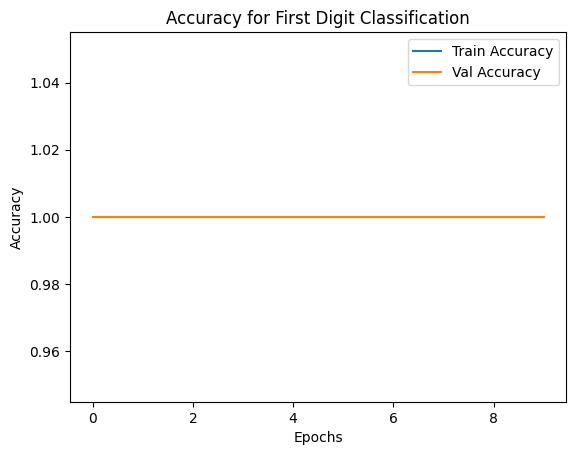

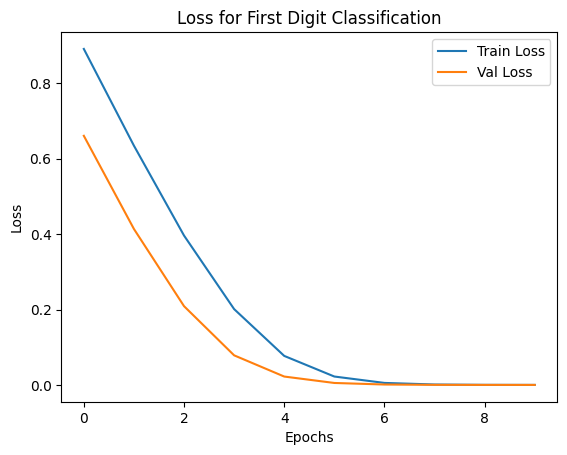

In [70]:
import matplotlib.pyplot as plt

# Plot accuracy and loss for CNN for the first digit
history_1 = cnn_digit_1.history.history

# Accuracy
plt.plot(history_1['accuracy'], label='Train Accuracy')
plt.plot(history_1['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy for First Digit Classification')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history_1['loss'], label='Train Loss')
plt.plot(history_1['val_loss'], label='Val Loss')
plt.title('Loss for First Digit Classification')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
